In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import math

In [6]:
train_data = pd.read_csv("./src/Flight_Price.csv")
train_data.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2025 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2025 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,9:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/3/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,3/13/2025 10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,1/3/2019,Banglore,New Delhi,BLR ? BOM ? DEL,8:00,3/2/2025 5:05,21h 5m,1 stop,No info,22270
8,Jet Airways,12/3/2019,Banglore,New Delhi,BLR ? BOM ? DEL,8:55,3/13/2025 10:25,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


## Data Preprocessing

In [7]:
train_data["Journey_Day"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.day

train_data["Journey_Month"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [8]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2025 1:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2025 4:25,19h,2 stops,No info,13882,9,6
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [10]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.hour

train_data["Dep_minute"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.minute

In [11]:
train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [12]:
# Step 1: Split the time from the full datetime string
train_data["Arrival_Time_Cleaned"] = train_data["Arrival_Time"].str.split().str[-1]

# Step 2: Parse the cleaned time strings to extract hour and minute
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time_Cleaned"], format='%H:%M').dt.hour
train_data["Arrival_minute"] = pd.to_datetime(train_data["Arrival_Time_Cleaned"], format='%H:%M').dt.minute


In [13]:
train_data.drop(columns=["Arrival_Time_Cleaned","Arrival_Time"], axis=1, inplace=True)

In [14]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hour = []
duration_minute = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [15]:
train_data["duration_hour"] = duration_hour
train_data["duration_minute"] = duration_minute

In [16]:
train_data.drop(["Duration"], axis=1, inplace=True)

In [17]:
train_data.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


## EDA

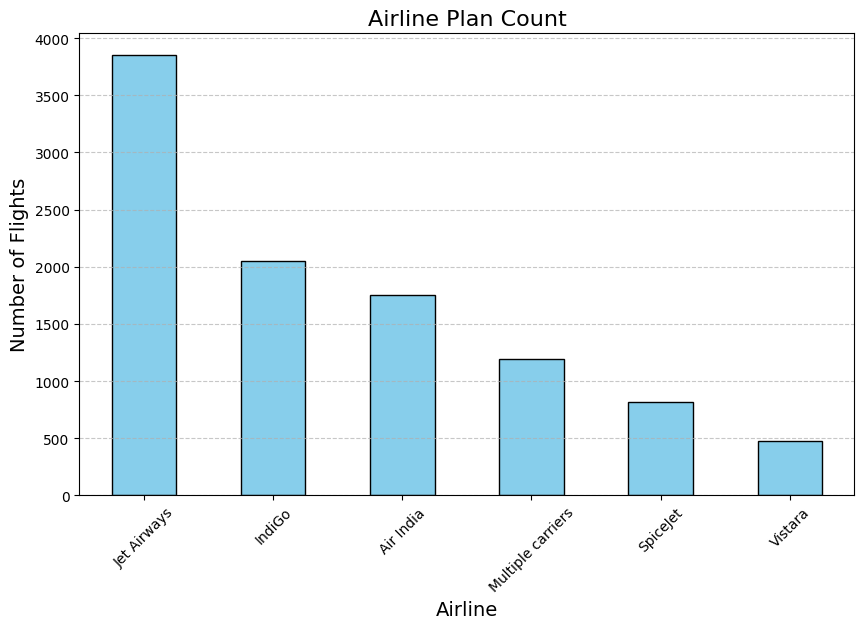

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


airline_counts = train_data["Airline"].value_counts().head(6)

# Plot histogram
plt.figure(figsize=(10, 6))
airline_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Airline Plan Count", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Number of Flights", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

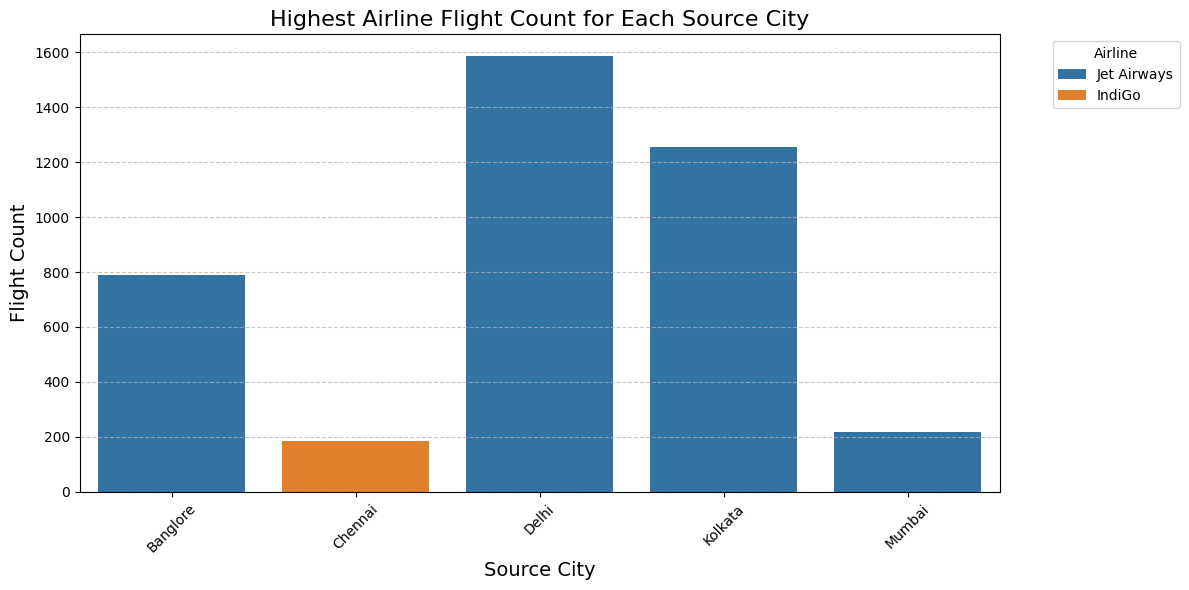

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Source and Airline, then count flights
source_airline_counts = train_data.groupby(["Source", "Airline"]).size().reset_index(name="Flight Count")

# Find the airline with the highest flight count for each source city
highest_airline_by_source = source_airline_counts.loc[
    source_airline_counts.groupby("Source")["Flight Count"].idxmax()
]

# Sort by Source city for cleaner visualization
highest_airline_by_source = highest_airline_by_source.sort_values("Source")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=highest_airline_by_source,
    x="Source",
    y="Flight Count",
    hue="Airline",
    dodge=False,
    palette="tab10"
)

plt.title("Highest Airline Flight Count for Each Source City", fontsize=16)
plt.xlabel("Source City", fontsize=14)
plt.ylabel("Flight Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Airline", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


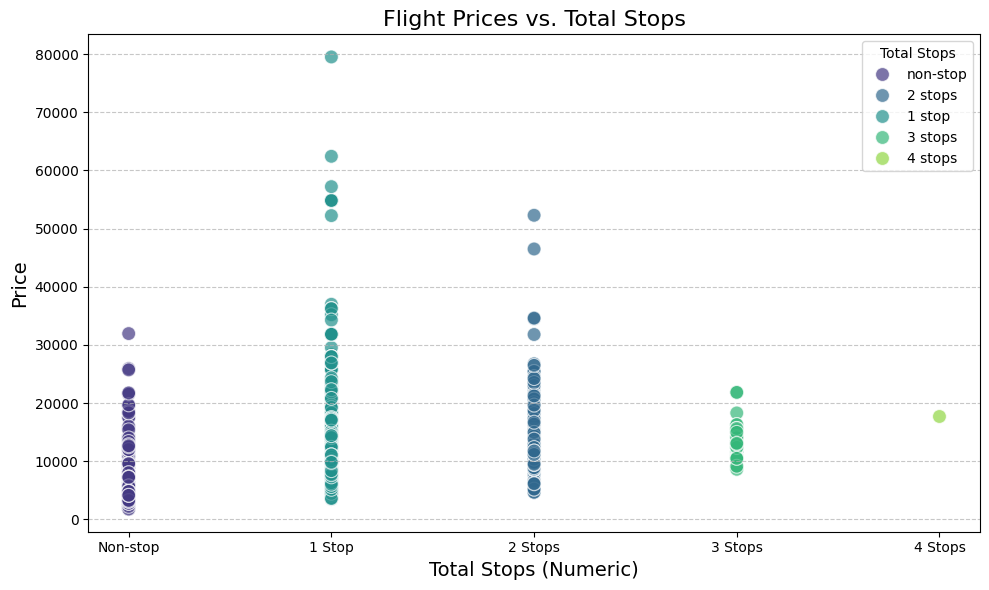

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Total_Stops' to numeric for plotting
stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
train_data['Total_Stops_numeric'] = train_data['Total_Stops'].map(stops_mapping)

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x="Total_Stops_numeric", y="Price", hue="Total_Stops", palette="viridis", s=100, alpha=0.7)

# Customize the plot
plt.title("Flight Prices vs. Total Stops", fontsize=16)
plt.xlabel("Total Stops (Numeric)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Non-stop", "1 Stop", "2 Stops", "3 Stops", "4 Stops"])
plt.legend(title="Total Stops", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Hardik_Viradiya\AppData\Local\Temp\ipykernel_10196\3284383630.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthwise_avg_price, x="Journey_Month", y="Price", palette="coolwarm")


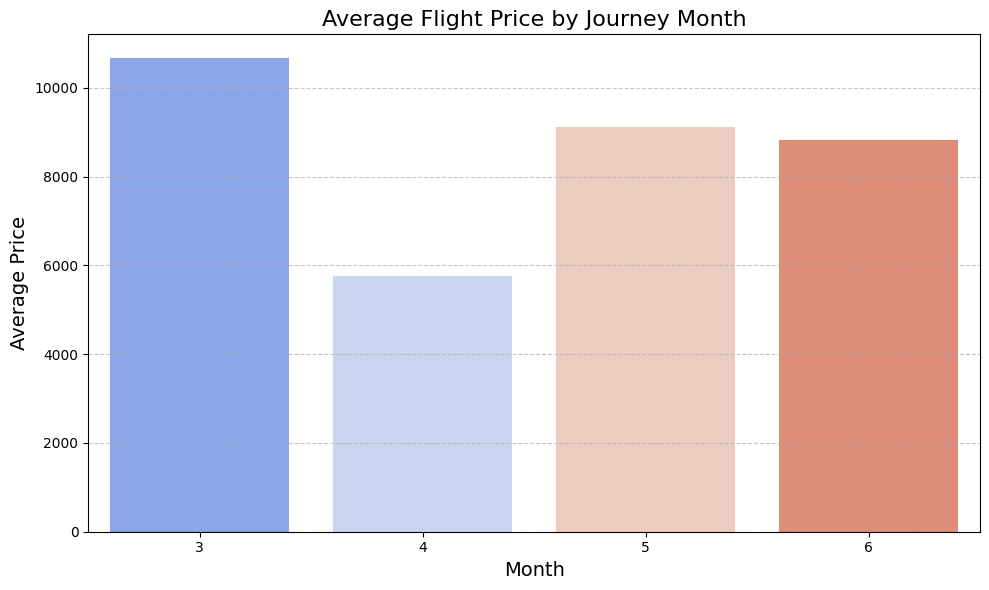

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Journey_Month and calculate the average price
monthwise_avg_price = train_data.groupby("Journey_Month")["Price"].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthwise_avg_price, x="Journey_Month", y="Price", palette="coolwarm")

# Customize the plot
plt.title("Average Flight Price by Journey Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.xticks(ticks=range(0, len(monthwise_avg_price)), labels=monthwise_avg_price["Journey_Month"].astype(int))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


## Handling Categorical Data

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

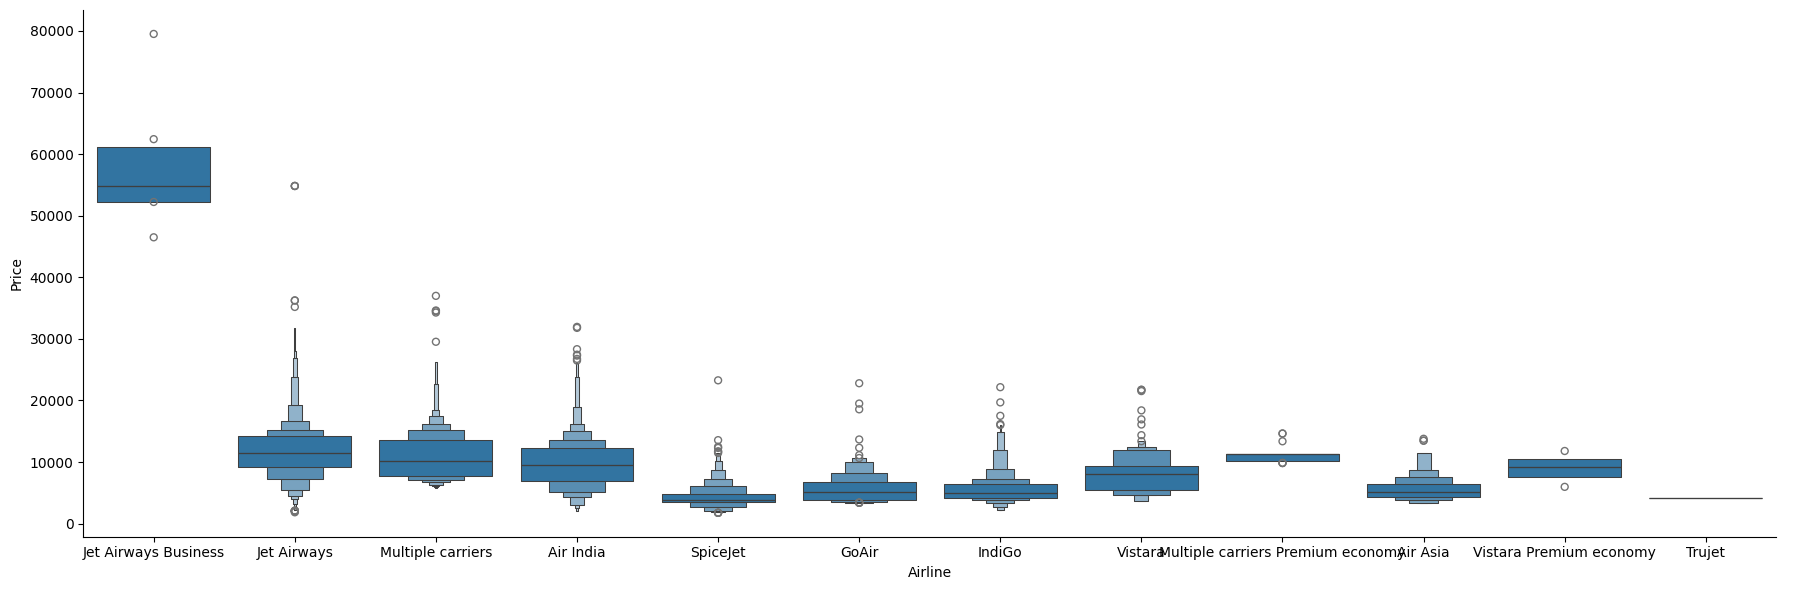

In [23]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending=False), height=6, aspect=3, kind="boxen")
plt.show()

In [ ]:
Airline = pd.get_dummies(train_data["Airline"], drop_first=True, dtype=int, prefix="Airline")
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
Source = pd.get_dummies(train_data["Source"], drop_first=True, dtype=int, prefix="Source")
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [26]:
Destination = pd.get_dummies(train_data["Destination"], drop_first=True, dtype=int, prefix="Destination")
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [28]:
train_data.replace({"1 stop": 1, "non-stop": 0, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)


C:\Users\Hardik_Viradiya\AppData\Local\Temp\ipykernel_10196\3803820532.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"1 stop": 1, "non-stop": 0, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)


In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Total_Stops_numeric
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0.0,No info,3897,24,3,22,20,1,10,2,50,0.0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2.0,No info,7662,1,5,5,50,13,15,7,25,2.0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2.0,No info,13882,9,6,9,25,4,25,19,0,2.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1.0,No info,6218,12,5,18,5,23,30,5,25,1.0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1.0,No info,13302,1,3,16,50,21,35,4,45,1.0


In [30]:
train_data.drop(columns=["Additional_Info","Route"], axis=1, inplace=True)

In [31]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [32]:
data_train["Total_Stops"] = data_train["Total_Stops"].fillna(0).astype(int)

In [33]:
data_train.drop(columns=["Airline","Source","Destination"], axis=1, inplace=True)

In [34]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Test data

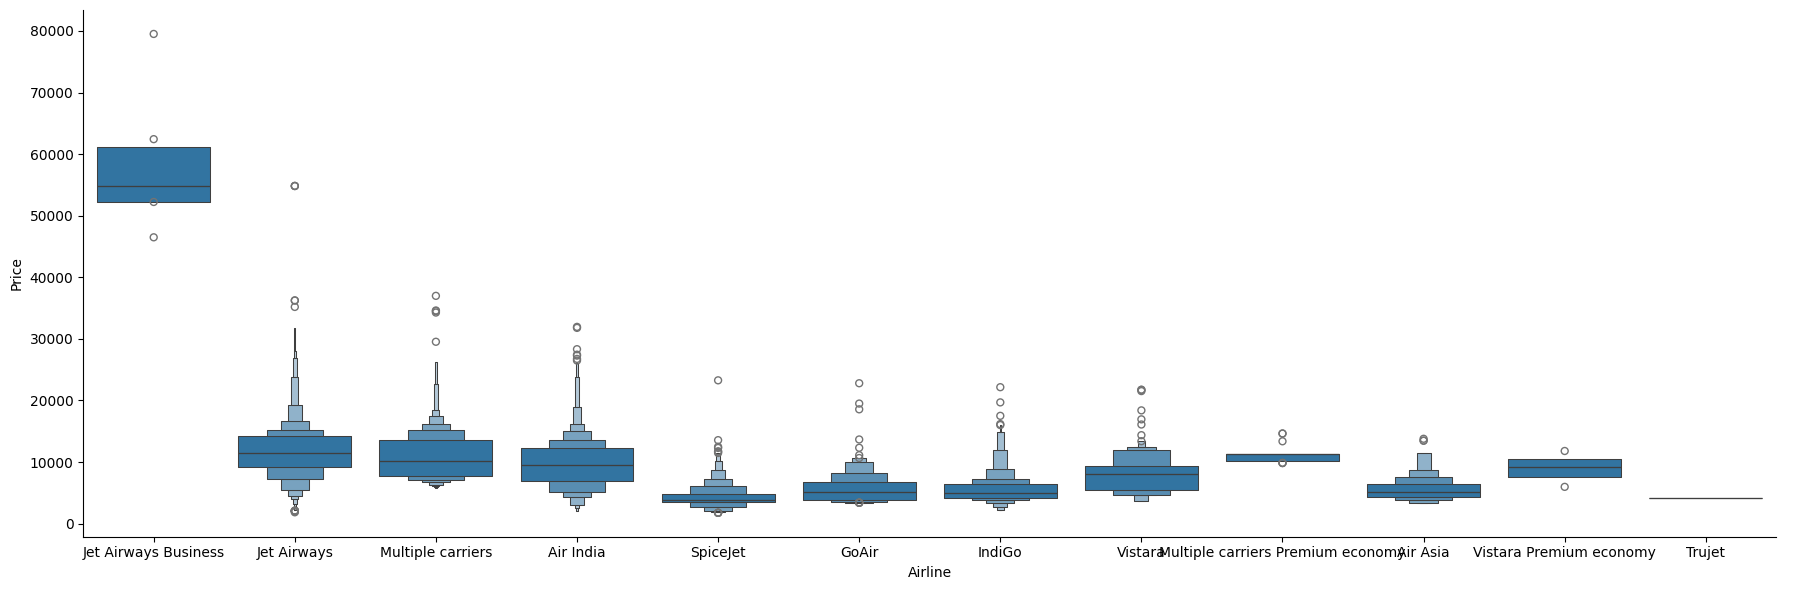

C:\Users\Hardik_Viradiya\AppData\Local\Temp\ipykernel_10196\201027245.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({"1 stop": 1, "non-stop": 0, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)


,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [35]:
import pandas as pd
import numpy as np
import datetime as dt
import math
test_data = pd.read_csv("./src/Flight_Price.csv")
test_data.head(15)
## Data Preprocessing
test_data["Journey_Day"] = pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.day

test_data["Journey_Month"] = pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
test_data.head()
test_data.drop(["Date_of_Journey"], axis=1, inplace=True)
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"], format='%H:%M').dt.hour

test_data["Dep_minute"] = pd.to_datetime(test_data["Dep_Time"], format='%H:%M').dt.minute
test_data.drop(["Dep_Time"], axis=1, inplace=True)
# Step 1: Split the time from the full datetime string
test_data["Arrival_Time_Cleaned"] = test_data["Arrival_Time"].str.split().str[-1]

# Step 2: Parse the cleaned time strings to extract hour and minute
test_data["Arrival_hour"] = pd.to_datetime(test_data["Arrival_Time_Cleaned"], format='%H:%M').dt.hour
test_data["Arrival_minute"] = pd.to_datetime(test_data["Arrival_Time_Cleaned"], format='%H:%M').dt.minute

test_data.drop(columns=["Arrival_Time_Cleaned","Arrival_Time"], axis=1, inplace=True)
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hour = []
duration_minute = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
test_data["duration_hour"] = duration_hour
test_data["duration_minute"] = duration_minute
test_data.drop(["Duration"], axis=1, inplace=True)
## Handling Categorical Data
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y = "Price", x = "Airline", data = test_data.sort_values("Price", ascending=False), height=6, aspect=3, kind="boxen")
plt.show()
Airline = pd.get_dummies(test_data["Airline"], drop_first=True, dtype=int)
Airline.head()
Source = pd.get_dummies(test_data["Source"], drop_first=True, dtype=int)
Source.head()
Destination = pd.get_dummies(test_data["Destination"], drop_first=True, dtype=int)
Destination.head()
test_data["Total_Stops"].value_counts()
test_data.replace({"1 stop": 1, "non-stop": 0, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

test_data.head()
test_data.drop(columns=["Additional_Info","Route"], axis=1, inplace=True)
data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)
data_test["Total_Stops"] = data_test["Total_Stops"].fillna(0).astype(int)
data_test.drop(columns=["Airline","Source","Destination"], axis=1, inplace=True)
data_test.head()

## Train and Test data

In [36]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hour',
       'duration_minute', 'Total_Stops_numeric', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [37]:
X = data_train.loc[:,['Total_Stops','Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hour',
       'duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

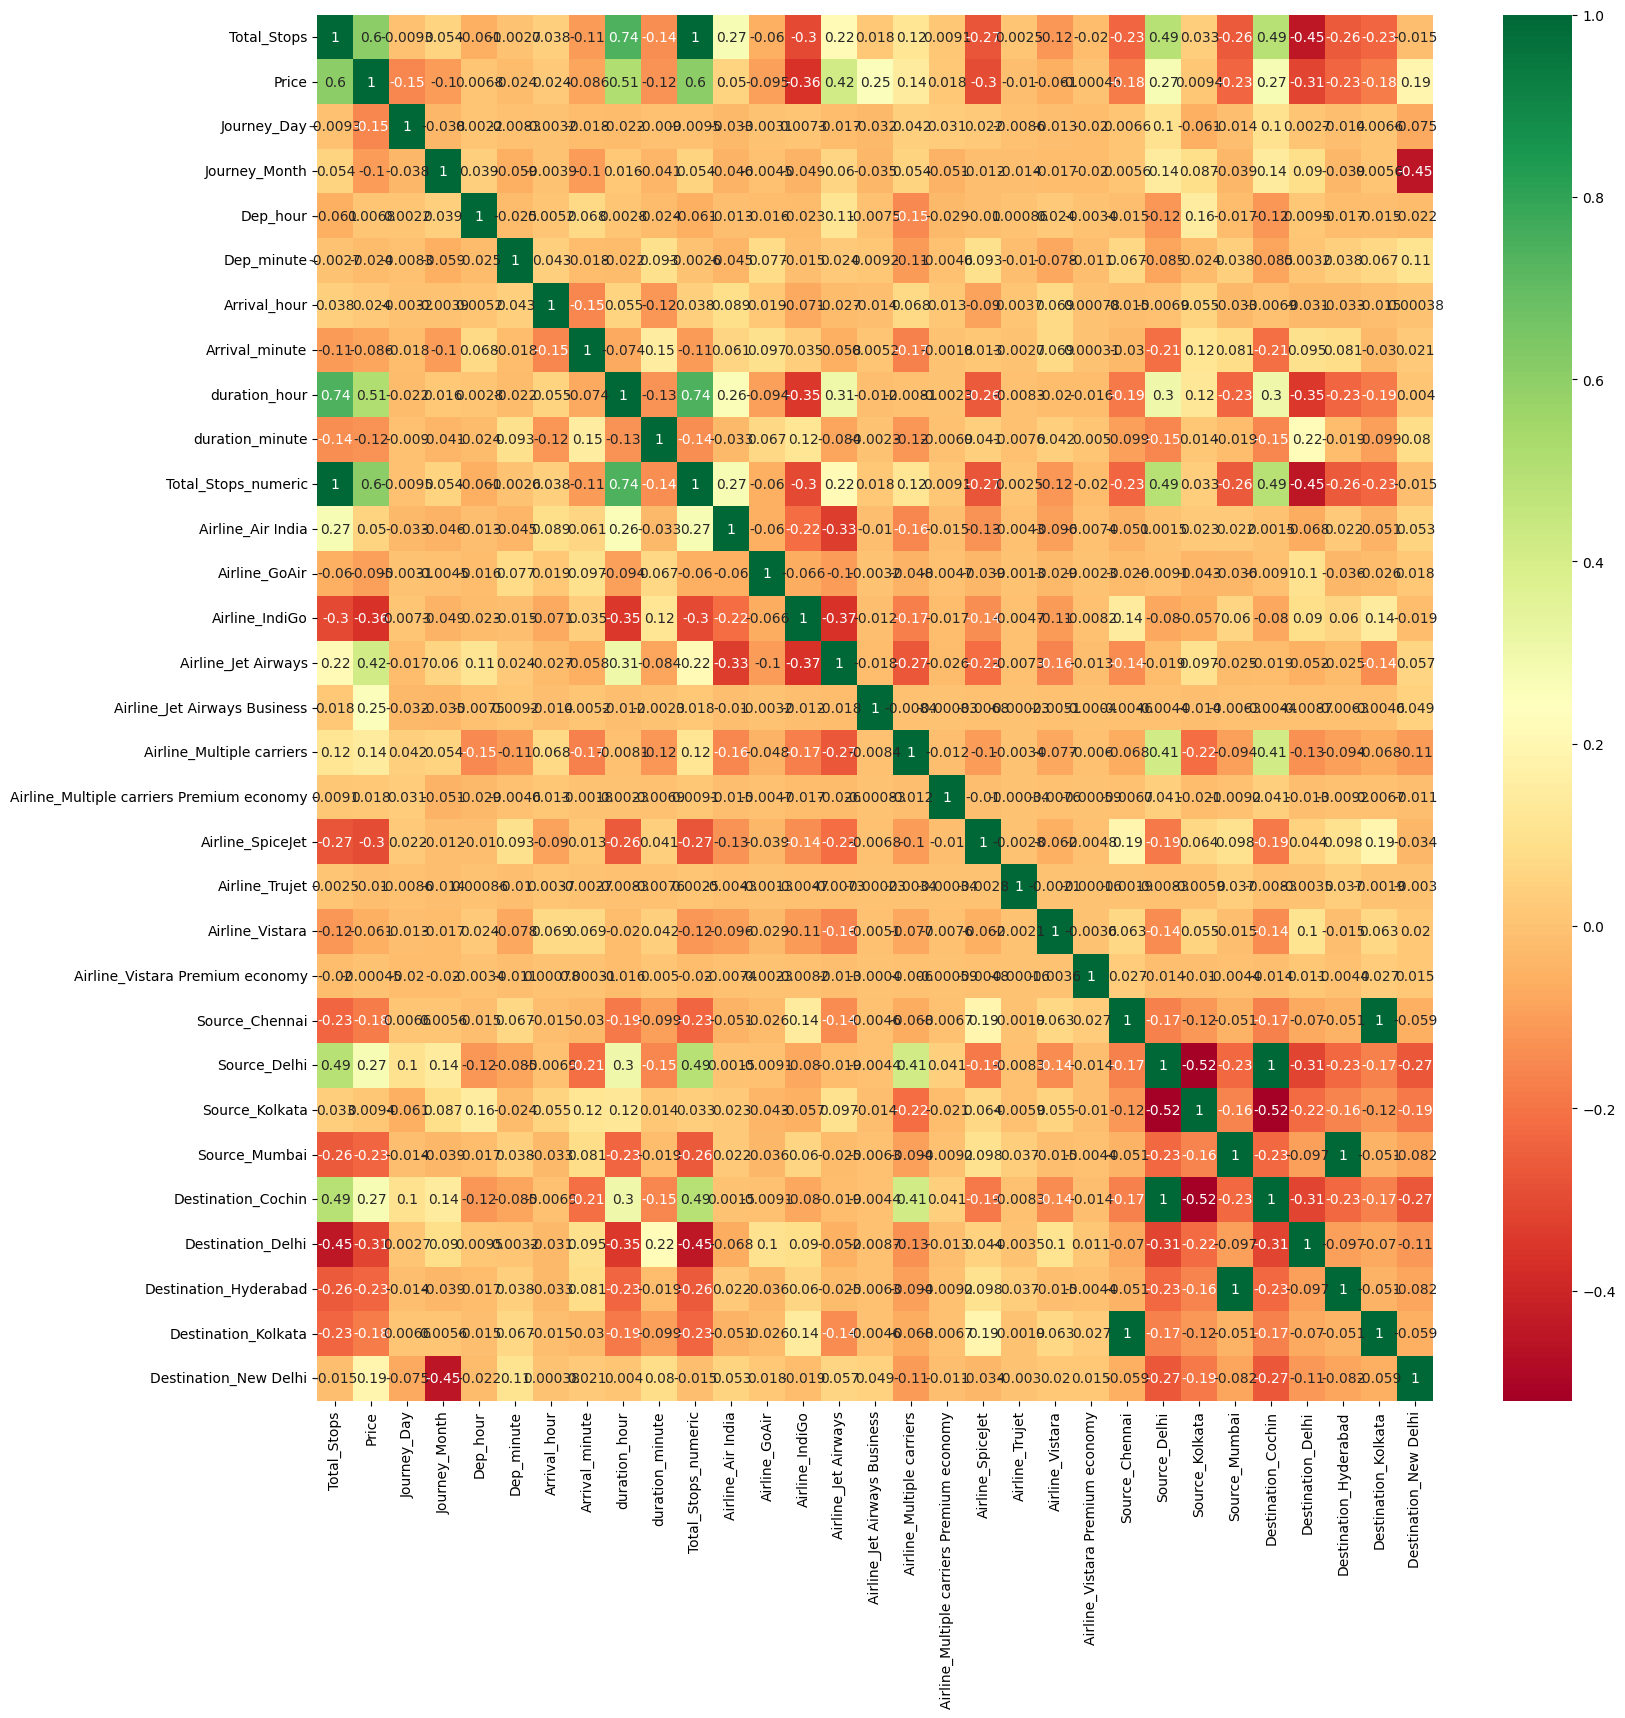

In [39]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [40]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [41]:
print(selection.feature_importances_)

[2.34338112e-01 1.44085670e-01 5.26956504e-02 2.36011808e-02
 2.14542078e-02 2.82997013e-02 1.88553547e-02 1.19587382e-01
 1.82065201e-02 9.05670504e-03 1.83381177e-03 1.78715061e-02
 1.40129593e-01 6.68285475e-02 1.89756206e-02 8.47271109e-04
 3.81034349e-03 9.30918463e-05 5.19435760e-03 7.64313081e-05
 4.95166404e-04 7.10949438e-03 3.48182601e-03 7.07230170e-03
 1.07010764e-02 1.35392017e-02 6.52041964e-03 4.04577328e-04
 2.48348782e-02]


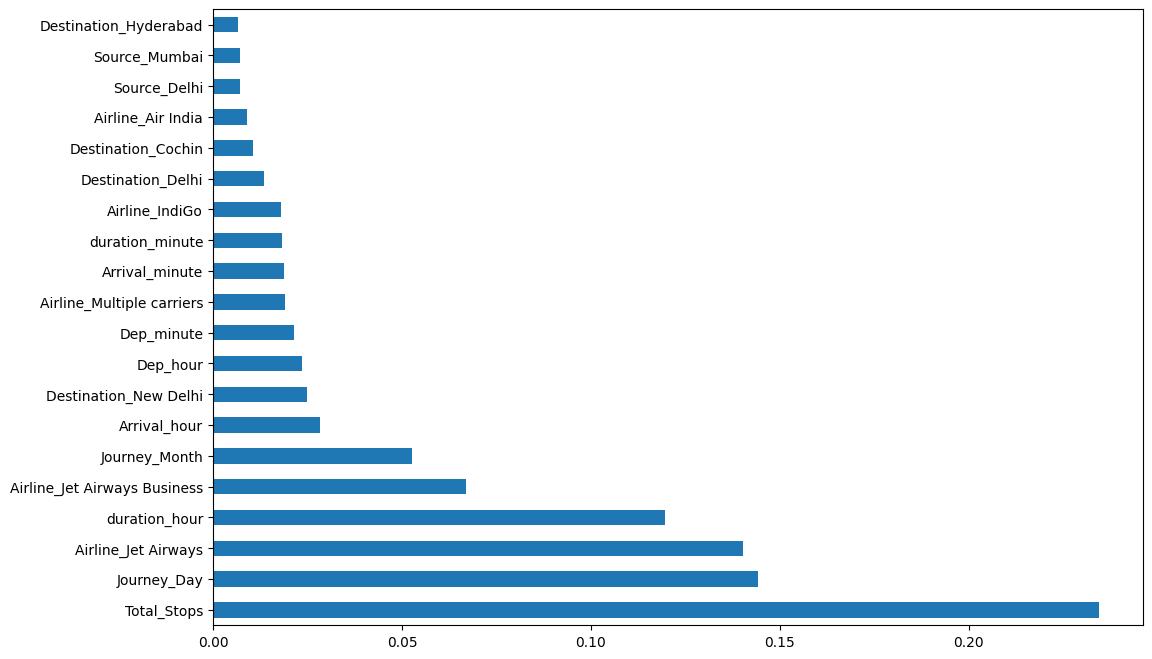

In [42]:
plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = reg_rf.predict(X_test)

In [46]:
reg_rf.score(X_train, y_train)

0.9546668789012019

In [ ]:
reg_rf.score(X_test,y_test)

0.7854376560537498

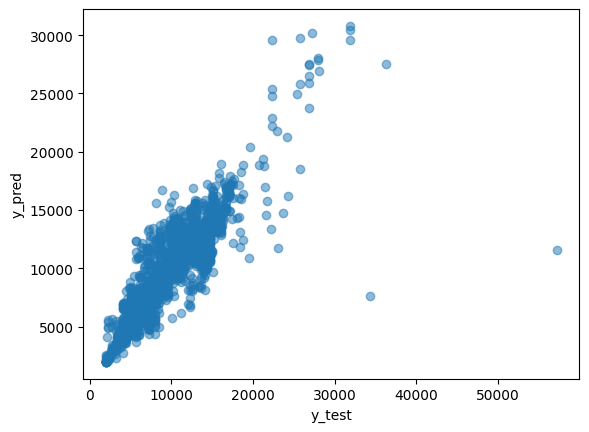

In [48]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1200.3282123681186
MSE: 4540990.1641055895
RMSE: 2130.959916118928


In [51]:
metrics.r2_score(y_test,y_pred)

0.7854376560537498

## Hyperparameter Tuning


In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]    

In [54]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [55]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [56]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\Hardik_Viradiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hardik_Viradiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hardik_Viradiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 10, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [57]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [58]:
prediction = rf_random.predict(X_test)

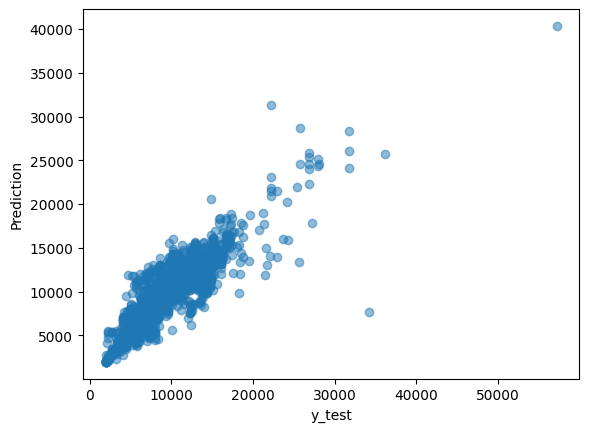

In [59]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("Prediction")
plt.show()

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1287.1826542899232
MSE: 4055467.8578345217
RMSE: 2013.8192217362814


In [61]:
import pickle
# open a file, where you ant to store the data
file = open('./pickle file/flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [62]:
model = open('./pickle file/flight_rf.pkl','rb')

forest = pickle.load(model)

In [66]:
y_prediction = forest.predict(X_test)

In [67]:
metrics.r2_score(y_test, prediction)

0.8083786447603898

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm =LinearRegression()

In [70]:
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
prediction_LR = lm.predict(X_test)


In [72]:
prediction_LR

array([10887.85721845,  7688.39461854, 12353.67462239, ...,
        6749.78018856,  4314.42443885, 11554.05841106], shape=(2137,))

Text(0, 0.5, 'Predicted Y')

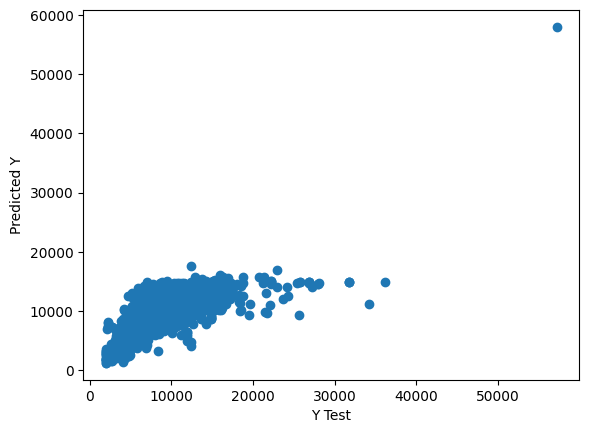

In [73]:
plt.scatter(y_test,prediction_LR)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## KNN

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [75]:
X = data_train.loc[:,['Total_Stops','Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hour',
       'duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [76]:
y = data_train.iloc[:,1]

In [77]:
XScaled  = X.apply(zscore)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.25, random_state=1)

In [79]:
NNH = KNeighborsRegressor(n_neighbors= 5 , weights = 'distance' )

In [80]:
NNH.fit(X_train, y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [81]:
predicted_labels_train = NNH.predict(X_train)
NNH.score(X_train, y_train)

0.972248114298019

In [ ]:
predicted_labels_test = NNH.predict(X_test)

NNH.score(X_test, y_test)

0.7117077035930975

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_train, predicted_labels_train)
mse = metrics.mean_squared_error(y_train, predicted_labels_train)
r2 = metrics.r2_score(y_train, predicted_labels_train)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 294.67801096268767
MSE: 585533.2955215817
R² Score: 0.972248114298019


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    "n_neighbors": [2, 3, 5, 7, 10, 15],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # Manhattan and Euclidean distances
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Best Parameters:", best_params)
print("RMSE:", rmse)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
RMSE: 2308.3026094519532


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrg = GradientBoostingRegressor(random_state=42)
gbrg = gbrg.fit(X_train, y_train)

In [ ]:
model_score = gbrg.score(X_train, y_train)
print(model_score)

0.7893506142991071


In [ ]:
model_score = gbrg.score(X_test, y_test)
print(model_score)

0.7642964217869316


In [ ]:
y_train_predict = gbrg.predict(X_train)
y_test_predict = gbrg.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error for train:", mean_absolute_error(y_train, y_train_predict))
print("Mean Absolute Error for test:", mean_absolute_error(y_test , y_test_predict))
from sklearn.metrics import r2_score
print("R² Score for train:", r2_score(y_train, y_train_predict))
print("R² Score for test:", r2_score(y_test, y_test_predict))
import numpy as np
print("Root Mean Squared Error for train:", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print("Root Mean Squared Error for test:", np.sqrt(mean_squared_error(y_test, y_test_predict)))


Mean Absolute Error for train: 1480.7622482926956
Mean Absolute Error for test: 1563.7080578954772
R² Score for train: 0.7893506142991071
R² Score for test: 0.7642964217869316
Root Mean Squared Error for train: 2108.189506126769
Root Mean Squared Error for test: 2264.2157007309042


## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
# Initializing the Decision Tree Regression model
model_DR = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model_DR.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
model_DR.score(X_train, y_train)

0.9703099236462784

In [ ]:
model_DR.score(X_test, y_test)

0.6856502304351384

In [ ]:
y_train_predict = model_DR.predict(X_train)
y_test_predict = model_DR.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error for train:", mean_absolute_error(y_train, y_train_predict))
print("Mean Absolute Error for test:", mean_absolute_error(y_test , y_test_predict))
from sklearn.metrics import r2_score
print("R² Score for train:", r2_score(y_train, y_train_predict))
print("R² Score for test:", r2_score(y_test, y_test_predict))
import numpy as np
print("Root Mean Squared Error for train:", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print("Root Mean Squared Error for test:", np.sqrt(mean_squared_error(y_test, y_test_predict)))


Mean Absolute Error for train: 314.5676980597996
Mean Absolute Error for test: 1331.0458742785838
R² Score for train: 0.9703099236462784
R² Score for test: 0.6856502304351384
Root Mean Squared Error for train: 791.2035045787708
Root Mean Squared Error for test: 2628.24236628129


## MLflow

In [ ]:
# import mlflow

In [ ]:
# mlflow.set_experiment("1st_Random_Forest")
# mlflow.set_tracking_uri("http://localhost:5000/")

<!-- ## Random Forest -->

In [ ]:
# with mlflow.start_run(run_name="RandomizedSearchCV"):
#     rf_random = RandomizedSearchCV(
#         estimator=reg_rf,
#         param_distributions=random_grid,
#         scoring="neg_mean_squared_error",
#         n_iter=10,
#         cv=5,
#         verbose=2,
#         random_state=42,
#         n_jobs=-1
#     )
#     rf_random.fit(X_train, y_train)
    
#     # Log best parameters and performance
#     best_params = rf_random.best_params_
#     mlflow.log_params(best_params)
    
#     prediction = rf_random.predict(X_test)
#     mae = metrics.mean_absolute_error(y_test, prediction)
#     mse = metrics.mean_squared_error(y_test, prediction)
#     rmse = np.sqrt(mse)
#     r2 = metrics.r2_score(y_test, prediction)
    
#     mlflow.log_metric("MAE", mae)
#     mlflow.log_metric("MSE", mse)
#     mlflow.log_metric("RMSE", rmse)
#     mlflow.log_metric("R2", r2)
    
#     # Log the best model
#     mlflow.sklearn.log_model(rf_random.best_estimator_, "best_random_forest_model")


<!-- ## Linear Regression -->

In [ ]:
# import mlflow
# import mlflow.sklearn
# from sklearn import metrics
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import tempfile

# # Start an MLflow run
# with mlflow.start_run(run_name="Linear Regression Model"):
#     # Train and predict
#     lm = LinearRegression()
#     lm.fit(X_train, y_train)
#     prediction_LR = lm.predict(X_test)

#     # Calculate evaluation metrics
#     mae = metrics.mean_absolute_error(y_test, prediction_LR)
#     mse = metrics.mean_squared_error(y_test, prediction_LR)
#     rmse = np.sqrt(mse)
#     r2 = metrics.r2_score(y_test, prediction_LR)

#     # Log metrics to MLflow
#     mlflow.log_metric("MAE", mae)
#     mlflow.log_metric("MSE", mse)
#     mlflow.log_metric("RMSE", rmse)
#     mlflow.log_metric("R2", r2)

#     # Log the model
#     mlflow.sklearn.log_model(lm, "linear_regression_model")

<!-- ## KNN -->

In [ ]:
# import mlflow
# import mlflow.sklearn
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Start an MLflow run
# with mlflow.start_run(run_name="KNN Regressor"):
#     # Initialize and train the KNN Regressor
#     NNH = KNeighborsRegressor(n_neighbors=5, weights='distance')
#     NNH.fit(X_train, y_train)

#     # Predictions for train and test sets
#     predicted_labels_train = NNH.predict(X_train)
#     predicted_labels_test = NNH.predict(X_test)

#     # Metrics for the train set
#     train_mae = mean_absolute_error(y_train, predicted_labels_train)
#     train_mse = mean_squared_error(y_train, predicted_labels_train)
#     train_r2 = r2_score(y_train, predicted_labels_train)

#     # Metrics for the test set
#     test_mae = mean_absolute_error(y_test, predicted_labels_test)
#     test_mse = mean_squared_error(y_test, predicted_labels_test)
#     test_r2 = r2_score(y_test, predicted_labels_test)

#     # Log parameters
#     mlflow.log_param("n_neighbors", 5)
#     mlflow.log_param("weights", "distance")

#     # Log metrics
#     mlflow.log_metric("Train MAE", train_mae)
#     mlflow.log_metric("Train MSE", train_mse)
#     mlflow.log_metric("Train R²", train_r2)
#     mlflow.log_metric("Test MAE", test_mae)
#     mlflow.log_metric("Test MSE", test_mse)
#     mlflow.log_metric("Test R²", test_r2)

#     # Log the model
#     mlflow.sklearn.log_model(NNH, "knn_model")


<!-- ## Gradient Boosting -->

In [ ]:
# import mlflow
# import mlflow.sklearn
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# import numpy as np

# # # Set the tracking URI to the local MLflow server
# # mlflow.set_tracking_uri("http://localhost:5000")

# # Start an MLflow run
# with mlflow.start_run(run_name="GradientBoostingRegressor Evaluation"):
#     # Predictions for train and test sets
#     y_train_predict = gbrg.predict(X_train)
#     y_test_predict = gbrg.predict(X_test)

#     # Metrics for train set
#     train_mae = mean_absolute_error(y_train, y_train_predict)
#     train_r2 = r2_score(y_train, y_train_predict)
#     train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

#     # Metrics for test set
#     test_mae = mean_absolute_error(y_test, y_test_predict)
#     test_r2 = r2_score(y_test, y_test_predict)
#     test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

#     # Log metrics
#     mlflow.log_metric("Train MAE", train_mae)
#     mlflow.log_metric("Train R²", train_r2)
#     mlflow.log_metric("Train RMSE", train_rmse)
#     mlflow.log_metric("Test MAE", test_mae)
#     mlflow.log_metric("Test R²", test_r2)
#     mlflow.log_metric("Test RMSE", test_rmse)

#     # Log model (assumes `gbrg` is your trained model)
#     mlflow.sklearn.log_model(gbrg, "gradient_boosting_model")   

<!-- ## Decision Tree Regressor -->

In [ ]:
# import mlflow
# import mlflow.sklearn
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# import numpy as np

# # Start an MLflow run
# with mlflow.start_run(run_name="DecisionTreeRegressor Evaluation"):
#     # Predictions for train and test sets
#     y_train_predict = model_DR.predict(X_train)
#     y_test_predict = model_DR.predict(X_test)

#     # Calculate metrics for train set
#     train_mae = mean_absolute_error(y_train, y_train_predict)
#     train_r2 = r2_score(y_train, y_train_predict)
#     train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

#     # Calculate metrics for test set
#     test_mae = mean_absolute_error(y_test, y_test_predict)
#     test_r2 = r2_score(y_test, y_test_predict)
#     test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

#     # Log metrics
#     mlflow.log_metric("Train MAE", train_mae)
#     mlflow.log_metric("Train R²", train_r2)
#     mlflow.log_metric("Train RMSE", train_rmse)
#     mlflow.log_metric("Test MAE", test_mae)
#     mlflow.log_metric("Test R²", test_r2)
#     mlflow.log_metric("Test RMSE", test_rmse)

#     # Log the model (ensure model_DR is the trained model)
#     mlflow.sklearn.log_model(model_DR, "decision_tree_regressor_model")